<a href="https://colab.research.google.com/github/Aryansalve/VGG16-Classifier/blob/main/VGG_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [2]:
import os
import cv2
from PIL import Image
import tensorflow as tf
from keras import backend as K
from keras.models import load_model
from tensorflow.keras.utils import img_to_array
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
#The python file and the archive have the same location
from zipfile import ZipFile
file_name = "/content/gdrive/MyDrive/Classifier project/archive.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

Done


In [4]:
import pandas as pd
import numpy as np
import os
from random import shuffle
import shutil

main_path='./output/bee-vs-wasp'
training_path=main_path+'/training'
testing_path=main_path+'/validation'
bee_training=training_path+'/bee'
wasp_training=training_path+'/wasp'
other_insects_training=training_path+'/other_insects'
other_noinsects_training=training_path+'/other_noinsects'
bee_testing=testing_path+'/bee'
wasp_testing=testing_path+'/wasp'
other_insects_testing=testing_path+'/other_insects'
other_noinsects_testing=testing_path+'/other_noinsects'
def directory_creation(path):
    os.mkdir(path)
directory_creation('./output')
directory_creation(main_path)
directory_creation(training_path)
directory_creation(testing_path)
directory_creation(bee_training)
directory_creation(wasp_training)
directory_creation(other_insects_training)
directory_creation(other_noinsects_training)
directory_creation(bee_testing)
directory_creation(wasp_testing)
directory_creation(other_insects_testing)
directory_creation(other_noinsects_testing)

In [5]:
def copy_files(original,dest_training,dest_testing):
    l=os.listdir(original)
    training_length=int(len(l)*0.8)
    shuffle(l)
    for i in range(len(l)):
        if i<training_length:
            shutil.copy(original+'/'+l[i],dest_training)
        else:
            shutil.copy(original+'/'+l[i],dest_testing)

In [6]:
copy_files('/content/kaggle_bee_vs_wasp/bee1',bee_training,bee_testing)
copy_files('/content/kaggle_bee_vs_wasp/bee2',bee_training,bee_testing)
copy_files('/content/kaggle_bee_vs_wasp/wasp1',wasp_training,wasp_testing)
copy_files('/content/kaggle_bee_vs_wasp/wasp2',wasp_training,wasp_testing)
copy_files('/content/kaggle_bee_vs_wasp/other_insect',other_insects_training,other_insects_testing)
copy_files('/content/kaggle_bee_vs_wasp/other_noinsect',other_noinsects_training,other_noinsects_testing)

In [7]:
base_dir = '/content/output/bee-vs-wasp'
train_dir = '/content/output/bee-vs-wasp/training'
train_bee_dir = '/content/output/bee-vs-wasp/training/bee'
train_wasp_dir = '/content/output/bee-vs-wasp/training/wasp'
train_insect_dir = '/content/output/bee-vs-wasp/training/other_insects'
train_other_dir = '/content/output/bee-vs-wasp/training/other_noinsects'
test_dir = '/content/output/bee-vs-wasp/validation'
test_bee_dir = '/content/output/bee-vs-wasp/validation/bee'
test_wasp_dir = '/content/output/bee-vs-wasp/validation/wasp'
test_insect_dir = '/content/output/bee-vs-wasp/validation/other_insects'
test_other_dir = '/content/output/bee-vs-wasp/validation/other_noinsects'

#no validation is used
# valid_dir =
# valid_bee_dir =
# valid_malign_dir =

In [8]:
num_bee_train = len(os.listdir(train_bee_dir))
num_wasp_train = len(os.listdir(train_wasp_dir))
num_insect_train = len(os.listdir(train_insect_dir))
num_other_train = len(os.listdir(train_other_dir))
num_bee_test = len(os.listdir(test_bee_dir))
num_wasp_test= len(os.listdir(test_wasp_dir))
num_insect_test = len(os.listdir(test_insect_dir))
num_other_test= len(os.listdir(test_other_dir))

# num_bee_validaition = len(os.listdir(valid_bee_dir))
# num_wasp_validation= len(os.listdir(valid_malign_dir))

In [9]:
print("Total Training bee Images",num_bee_train)
print("Total Training wasp Images",num_wasp_train)
print("Total Training other Images",num_other_train)
print("Total Training insect Images",num_insect_train)
print("--")
print("Total Test bee Images", num_bee_test)
print("Total Test wasp Images",num_wasp_test)
print("Total Test other Images", num_other_test)
print("Total Test insect Images",num_insect_test)
total_train = num_bee_train+num_wasp_train+num_other_train+num_insect_train
total_test = num_bee_test+num_wasp_test+num_other_test+num_insect_test
print("--")
print("Total Training Images",total_train)
print("Total Testing Images",total_test)

Total Training bee Images 2546
Total Training wasp Images 3953
Total Training other Images 684
Total Training insect Images 1951
--
Total Test bee Images 637
Total Test wasp Images 990
Total Test other Images 172
Total Test insect Images 488
--
Total Training Images 9134
Total Testing Images 2287


In [10]:
IMG_SHAPE  = 224
batch_size = 32

In [11]:
image_gen_train = ImageDataGenerator(rescale = 1./255)
train_data_gen = image_gen_train.flow_from_directory(batch_size = batch_size,
directory = train_dir,
shuffle= True,
target_size = (IMG_SHAPE,IMG_SHAPE),
class_mode = 'binary')
image_gen_test = ImageDataGenerator(rescale=1./255)
test_data_gen = image_gen_test.flow_from_directory(batch_size=batch_size,
directory=test_dir,
target_size=(IMG_SHAPE, IMG_SHAPE),
class_mode='binary')

Found 9134 images belonging to 4 classes.
Found 2287 images belonging to 4 classes.


In [12]:
pre_trained_model = tf.keras.applications.VGG16(input_shape=(224, 224, 3), include_top=False, weights="imagenet")
#Could be useless since i wont freez the layers

58889256/58889256 [==============================] - 4s 0us/step


In [13]:
# for layer in pre_trained_model.layers:
#   print(layer.name)
#   layer.trainable = False

input_1
block1_conv1
block1_conv2
block1_pool
block2_conv1
block2_conv2
block2_pool
block3_conv1
block3_conv2
block3_conv3
block3_pool
block4_conv1
block4_conv2
block4_conv3
block4_pool
block5_conv1
block5_conv2
block5_conv3
block5_pool


In [13]:
last_layer = pre_trained_model.get_layer('block5_pool')
last_output = last_layer.output
x = tf.keras.layers.GlobalMaxPooling2D()(last_output)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(4, activation='softmax')(x)

In [14]:
model = tf.keras.Model(pre_trained_model.input, x)

In [15]:
model.compile(optimizer='adam', loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=['acc'])

In [16]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [17]:
checkpoint_path = '/content/gdrive/MyDrive/Classifier project/vgg16_model_bee'

In [22]:

# checkpoint = ModelCheckpoint(checkpoint_path,
#                              monitor='val_loss',
#                              save_best_only=False,
#                              mode='min', verbose=1)

In [18]:
# Initial run
vgg_classifier = model.fit(train_data_gen,
steps_per_epoch=(total_train//(batch_size)),
epochs = 10,
validation_data=test_data_gen,
validation_steps=(total_test//(batch_size)),
batch_size = batch_size)
# batch_size = batch_size,callbacks=[checkpoint])

Epoch 1/10
285/285 [==============================] - 154s 445ms/step - loss: 1.2345 - acc: 0.4789 - val_loss: 1.0585 - val_acc: 0.5607
Epoch 2/10
285/285 [==============================] - 120s 421ms/step - loss: 1.0442 - acc: 0.5767 - val_loss: 1.0215 - val_acc: 0.5647
Epoch 3/10
285/285 [==============================] - 131s 460ms/step - loss: 1.0040 - acc: 0.5998 - val_loss: 0.9412 - val_acc: 0.6175
Epoch 4/10
285/285 [==============================] - 120s 419ms/step - loss: 0.9356 - acc: 0.6322 - val_loss: 0.8984 - val_acc: 0.6562
Epoch 5/10
285/285 [==============================] - 121s 423ms/step - loss: 0.9227 - acc: 0.6416 - val_loss: 0.8462 - val_acc: 0.6673
Epoch 6/10
285/285 [==============================] - 120s 422ms/step - loss: 0.8511 - acc: 0.6635 - val_loss: 0.9102 - val_acc: 0.6589
Epoch 7/10
285/285 [==============================] - 120s 422ms/step - loss: 0.8208 - acc: 0.6806 - val_loss: 0.7370 - val_acc: 0.7196
Epoch 8/10
285/285 [============================

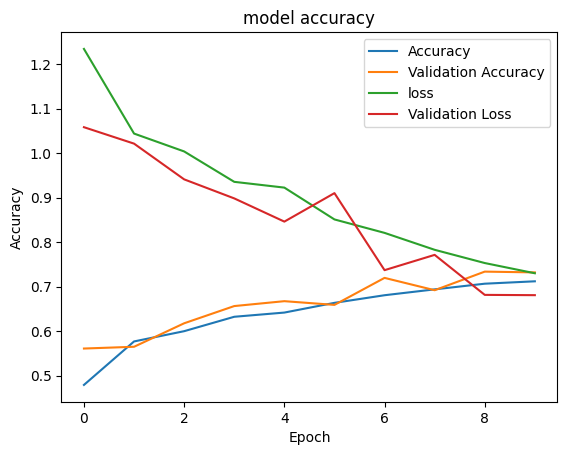

In [19]:
import matplotlib.pyplot as plt
plt.plot(vgg_classifier.history["acc"])
plt.plot(vgg_classifier.history['val_acc'])
plt.plot(vgg_classifier.history['loss'])
plt.plot(vgg_classifier.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()

In [20]:
model.save('/content/gdrive/MyDrive/Classifier project/vgg16_model_bee')

In [23]:
# Only run when resuming !!
model.load_weights("/content/gdrive/MyDrive/Classifier project/vgg16_model_bee")


In [ ]:
#Resumed Run
model.fit(train_data_gen,
          batch_size=batch_size,
          steps_per_epoch=(total_train//(batch_size)),
          initial_epoch=5,
          epochs=10,
          validation_data=test_data_gen,
          validation_steps=(total_test//(batch_size)))

In [ ]:
from tensorflow.keras.preprocessing import image as img
def testing_image(image_directory): #testing out our model
    test_image = img.load_img(image_directory, target_size = (224, 224))
    test_image = img.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis = 0)
    result = model.predict(x = test_image)
    print(result)
    if result[0][2]==max(result[0]):
        print('Other than insects')
    elif result[0][1]==max(result[0]):
        print('Insects')
    elif result[0][0]==max(result[0]):
        print('Bees')
    else:
        print('wasps')

In [ ]:
model.evaluate(test_data_gen)

72/72 [==============================] - 925s 13s/step - loss: 0.5171 - acc: 0.8019


[0.5170574188232422, 0.801923930644989]

In [ ]:
testing_image('/content/kaggle_bee_vs_wasp/other_noinsect/501323.jpg')